In [1]:
# Dimentionality Reduction 
'''
PCA Analysis of Network Topology correlation with Free Text (DOIs) over time (snapshots).
Followed by an anaylsis of DOIs and their associated:
- Behavior aspects(personality traits)
- Biological aspect (gender)
'''
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt

# PCA Analysis for Dimentionality Reduction to find PCs with min variance
snaps=[1,2,10,19]
for snap in snaps:
    plt.clf()
    dataset = pd.read_csv('Data/snap_{}_dois_100.csv'.format(snap),index_col=0)

    fig, ax = plt.subplots(figsize=(14,10), nrows=2, ncols=1)    
    norm_data = preprocessing.scale(dataset)
    pca = PCA()
    pca.fit(norm_data)
    pca_data = pca.transform(norm_data)

    ## exploring number of PC affect on variance
    exp_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
    labels = ['PC' + str(n) for n in range(1,len(exp_var)+1)]
    ax[0].bar(x=range(1,len(exp_var)+1),height=exp_var, tick_label=labels,color='b')
    ax[0].set_ylabel('percentaeg of explained Variance')
    ax[0].set_xlabel('PC')
    ax[0].set_title(f'PCA Analysis snap:{snap}\nScree Plot')        
    
    # visualize the 2 main PC
    pca_df = pd.DataFrame(pca_data, columns=labels,index=dataset.index)
    ax[1].scatter(pca_df.PC1,pca_df.PC2)
    ax[1].set_title(f'PCA Analysis')
    ax[1].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[1].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    for doi in pca_df.index:
        ax[1].annotate(doi,(pca_df.PC1.loc[doi], pca_df.PC2.loc[doi]))
    plt.savefig(f'Results/DOIs_PCA_{snap}')
    
    '''
    #the same analysis for exploring features
    fig, ax = plt.subplots(figsize=(14,10), nrows=2, ncols=1)    
    ## PCA analysis for explaining the main clusters of features
    norm_data2 = preprocessing.scale(dataset.T)
    pca2 = PCA()
    pca2.fit(norm_data2)
    pca_data2 = pca2.transform(norm_data2)

    ## exploring number of PC affect on variance
    exp_var2 = np.round(pca2.explained_variance_ratio_ *100, decimals=1)
    labels = ['PC' + str(n) for n in range(1,len(exp_var2)+1)]
    ax[0].bar(x=range(1,len(exp_var2)+1),height=exp_var2, tick_label=labels,color='b')
    ax[0].set_ylabel('percentaeg of explained Variance')
    ax[0].set_xlabel('PC')
    ax[0].set_title(f'PCA Analysis snap:{snap}\nScree Plot - 2 main PCs')        
    
    #main PC
    pca_df2 = pd.DataFrame(pca_data2, columns=labels,index=dataset.columns)
    ax[1].scatter(pca_df2.PC1,pca_df2.PC2)
    ax[1].set_title(f'PCA Analysis')
    ax[1].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[1].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    for feature in pca_df2.index:
        ax[1].annotate(feature,(pca_df2.PC1.loc[feature], pca_df2.PC2.loc[feature]))
    plt.savefig(f'Results/Features_PCA_{snap}')
    '''


<Figure size 432x288 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

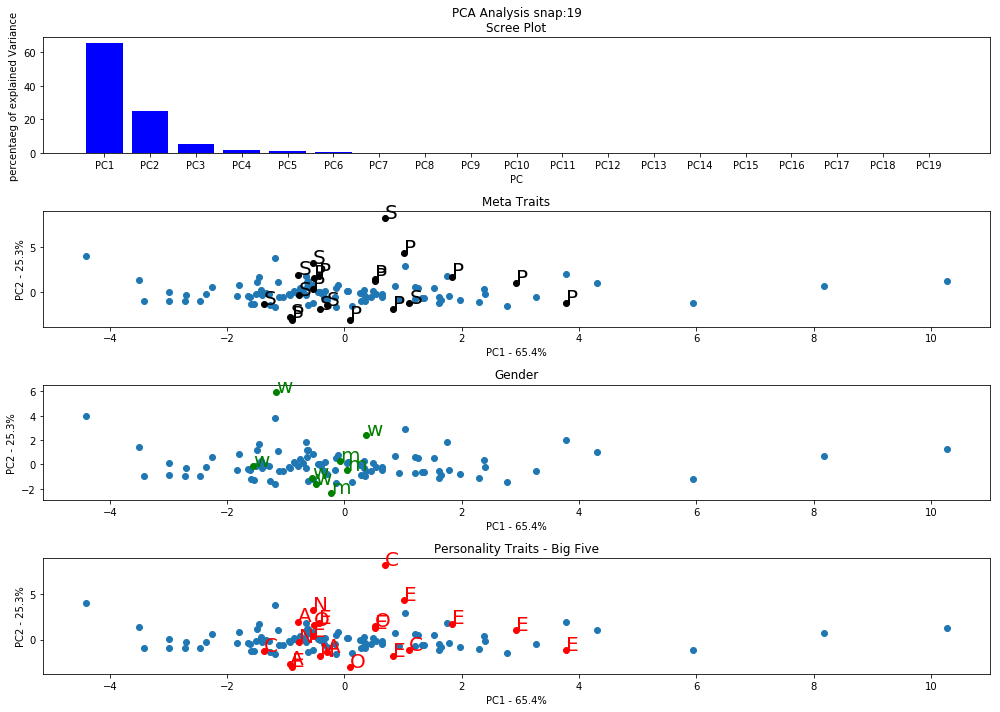

In [5]:
# Free text associated with personality trais and gender
doi2per = pd.read_csv('Data/doi2big5.csv')
doi2gen = pd.read_csv('Data/doi2gender.csv')
doi2met = pd.read_csv('Data/doi2meta.csv')
#Looking at 3 different combinations of Principal Components (PC) with max variance

#PCA1 + PC2
for snap in snaps:
    plt.clf()
    dataset = pd.read_csv('Data/snap_{}_dois_100.csv'.format(snap),index_col=0)
    fig, ax = plt.subplots(figsize=(14,10), nrows=4, ncols=1)    
    
    ## PCA analysis for explaining the main clusters of DOIs
    norm_data = preprocessing.scale(dataset)
    pca = PCA()
    pca.fit(norm_data)
    pca_data = pca.transform(norm_data)

    ## exploring number of PC affect on variance
    exp_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
    labels = ['PC' + str(n) for n in range(1,len(exp_var)+1)]
    ax[0].bar(x=range(1,len(exp_var)+1),height=exp_var, tick_label=labels,color='b')
    ax[0].set_ylabel('percentaeg of explained Variance')
    ax[0].set_xlabel('PC')
    ax[0].set_title(f'PCA Analysis snap:{snap}\nScree Plot')        
    
    #main PC
    pca_df = pd.DataFrame(pca_data, columns=labels,index=dataset.index)
    
    ax[1].scatter(pca_df.PC1,pca_df.PC2)
    ax[1].set_title(f'Meta Traits')
    ax[1].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[1].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    ax[2].scatter(pca_df.PC1,pca_df.PC2)
    ax[2].set_title(f'Gender')
    ax[2].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[2].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    ax[3].scatter(pca_df.PC1,pca_df.PC2)
    ax[3].set_title(f'Personality Traits - Big Five')
    ax[3].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[3].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    for doi in pca_df.index:
        #associated with personality traits
        if doi in doi2per['DOIs'].values:
            ax[1].annotate(doi2met.loc[doi2met['DOIs'] == doi , 'Meta'].iloc[0],(pca_df.PC1.loc[doi], pca_df.PC2.loc[doi]),color='k',fontsize=20)
            ax[1].scatter(pca_df.PC1.loc[doi],pca_df.PC2.loc[doi],color='k')
            ax[3].annotate(doi2per.loc[doi2per['DOIs'] == doi , 'Traits'].iloc[0],(pca_df.PC1.loc[doi], pca_df.PC2.loc[doi]),color='r',fontsize=20)
            ax[3].scatter(pca_df.PC1.loc[doi],pca_df.PC2.loc[doi],color='r')
        #associated with gender
        elif doi in doi2gen['DOIs'].values:
            ax[2].annotate(doi2gen.loc[doi2gen['DOIs'] == doi , 'Gender'].iloc[0],(pca_df.PC1.loc[doi], pca_df.PC2.loc[doi]),color='g',fontsize=20)
            ax[2].scatter(pca_df.PC1.loc[doi],pca_df.PC2.loc[doi],color='g')

        
    
    plt.tight_layout()
    plt.savefig(f'Results/per_gen_PC12_{snap}')

#PC1 + PC3
snaps=[1,2,10,19]
for snap in snaps:
    plt.clf()
    dataset = pd.read_csv('Data/snap_{}_dois_100.csv'.format(snap),index_col=0)
    fig, ax = plt.subplots(figsize=(14,10), nrows=4, ncols=1)  
    
    ## PCA analysis for explaining the main clusters of DOIs
    norm_data = preprocessing.scale(dataset)
    pca = PCA()
    pca.fit(norm_data)
    pca_data = pca.transform(norm_data)

    ## exploring number of PC affect on variance
    exp_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
    labels = ['PC' + str(n) for n in range(1,len(exp_var)+1)]
    
    ax[0].bar(x=range(1,len(exp_var)+1),height=exp_var, tick_label=labels,color='b')
    ax[0].set_ylabel('percentaeg of explained Variance')
    ax[0].set_xlabel('PC')
    ax[0].set_title(f'PCA Analysis snap:{snap}\nScree Plot')        
    
    #main PC
    pca_df = pd.DataFrame(pca_data, columns=labels,index=dataset.index)
    ax[1].scatter(pca_df.PC1,pca_df.PC3)
    ax[1].set_title(f'Meta Traits')
    ax[1].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[1].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    ax[2].scatter(pca_df.PC1,pca_df.PC3)
    ax[2].set_title(f'Gender')
    ax[2].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[2].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    ax[3].scatter(pca_df.PC1,pca_df.PC3)
    ax[3].set_title(f'Personality Traits - Big Five')
    ax[3].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[3].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    for doi in pca_df.index:
        #associated with personality traits
        if doi in doi2per['DOIs'].values:
            ax[1].annotate(doi2met.loc[doi2met['DOIs'] == doi , 'Meta'].iloc[0],(pca_df.PC1.loc[doi], pca_df.PC3.loc[doi]),color='k',fontsize=20)
            ax[1].scatter(pca_df.PC1.loc[doi],pca_df.PC3.loc[doi],color='k')
            ax[3].annotate(doi2per.loc[doi2per['DOIs'] == doi , 'Traits'].iloc[0],(pca_df.PC1.loc[doi], pca_df.PC3.loc[doi]),color='r',fontsize=20)
            ax[3].scatter(pca_df.PC1.loc[doi],pca_df.PC3.loc[doi],color='r')
        #associated with gender
        elif doi in doi2gen['DOIs'].values:
            ax[2].annotate(doi2gen.loc[doi2gen['DOIs'] == doi , 'Gender'].iloc[0],(pca_df.PC1.loc[doi], pca_df.PC3.loc[doi]),color='g',fontsize=20)
            ax[2].scatter(pca_df.PC1.loc[doi],pca_df.PC3.loc[doi],color='g')

    
    plt.tight_layout()
    plt.savefig(f'Results/per_gen_PC13_{snap}')

#PC2 + PC3
snaps=[1,2,10,19]
for snap in snaps:
    plt.clf()
    dataset = pd.read_csv('Data/snap_{}_dois_100.csv'.format(snap),index_col=0)
    fig, ax = plt.subplots(figsize=(14,10), nrows=4, ncols=1)    
    ## PCA analysis for explaining the main clusters of DOIs
    norm_data = preprocessing.scale(dataset)
    pca = PCA()
    pca.fit(norm_data)
    pca_data = pca.transform(norm_data)

    ## exploring number of PC affect on variance
    exp_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
    labels = ['PC' + str(n) for n in range(1,len(exp_var)+1)]
    ax[0].bar(x=range(1,len(exp_var)+1),height=exp_var, tick_label=labels,color='b')
    ax[0].set_ylabel('percentaeg of explained Variance')
    ax[0].set_xlabel('PC')
    ax[0].set_title(f'PCA Analysis snap:{snap}\nScree Plot')        
    
    #main PC
    pca_df = pd.DataFrame(pca_data, columns=labels,index=dataset.index)
    ax[1].scatter(pca_df.PC2,pca_df.PC3)
    ax[1].set_title(f'Meta Traits')
    ax[1].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[1].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    ax[2].scatter(pca_df.PC2,pca_df.PC3)
    ax[2].set_title(f'Gender')
    ax[2].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[2].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    ax[3].scatter(pca_df.PC2,pca_df.PC3)
    ax[3].set_title(f'Personality Traits - Big Five')
    ax[3].set_xlabel(f'PC1 - {exp_var[0]}%')
    ax[3].set_ylabel(f'PC2 - {exp_var[1]}%')
    
    for doi in pca_df.index:
        if doi in doi2per['DOIs'].values:
            ax[1].annotate(doi2met.loc[doi2met['DOIs'] == doi , 'Meta'].iloc[0],(pca_df.PC3.loc[doi], pca_df.PC2.loc[doi]),color='k',fontsize=20)
            ax[1].scatter(pca_df.PC3.loc[doi],pca_df.PC2.loc[doi],color='k')
            ax[3].annotate(doi2per.loc[doi2per['DOIs'] == doi , 'Traits'].iloc[0],(pca_df.PC3.loc[doi], pca_df.PC2.loc[doi]),color='r',fontsize=20)
            ax[3].scatter(pca_df.PC3.loc[doi],pca_df.PC2.loc[doi],color='r')
        elif doi in doi2gen['DOIs'].values:
            ax[2].annotate(doi2gen.loc[doi2gen['DOIs'] == doi , 'Gender'].iloc[0],(pca_df.PC3.loc[doi], pca_df.PC2.loc[doi]),color='g',fontsize=20)
            ax[2].scatter(pca_df.PC3.loc[doi],pca_df.PC2.loc[doi],color='g')

    
    plt.tight_layout()
    plt.savefig(f'Results/per_gen_PC32_{snap}')